### This notebook gives more information on the training.h5 and validation.h5 datasets. These datasets were generated using UCLCHEM. The parameters used for the UCLCHEM models is included below.

param_dict = {
    "currentTime": 0,
    "endatfinaldensity": False,
    "freefall": False,
    "initialTemp": input.temperature,
    "initialDens": input.density,
    "radfield": input.radfield,
    "baseAv": input.av,
    "zeta": 2.31,
    "outputFile": input.outputFile,
    "finalTime": 1.0e5,
    "ion": 0,
    "fh": 0.5,
}

In [1]:
import pandas as pd
import numpy as np
import torch
import h5py
import AstroChemNet.data_processing as dp
from AstroChemNet.configs import DatasetConfig
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_hdf('../../data/uclchem_training.h5', key='models', start=0, stop=1)

df1 = df[DatasetConfig.species].to_numpy().astype(np.float32)

np.clip(
    df1, 
    DatasetConfig.abundances_lower_clipping, 
    DatasetConfig.abundances_upper_clipping, 
    out=df1
)

print(df1.shape)

np.save('../../utils/initial_abundances.npy', df1)

(1, 333)


In [ ]:
metadata = ["Index", "Model", "Time"]
physical_parameters = ["Density", "av", "Temperature", "Radfield"]

df = pd.read_hdf('your_file.h5', key='your_key')


### Importing the Datasets

In [ ]:
training_dataset, training_indices = dp.load_tensors_from_hdf5(category="training") #torch

training_dataset = training_dataset[:, :-12]

unique_models = training_dataset[:, 1].unique()

num_models_to_select = 20
random_model_indices = torch.randperm(len(unique_models))[:num_models_to_select]
selected_models = unique_models[random_model_indices]

mask = torch.zeros(len(training_dataset), dtype=torch.bool)
for model_id in selected_models:
    model_mask = training_dataset[:, 1] == model_id
    mask = mask | model_mask

subset_data = training_dataset[mask]

with h5py.File(f"sample_data.h5", "w") as f:
    f.create_dataset("dataset", data=subset_data.numpy(), dtype=np.float32)

In [14]:
print(subset_data.shape)

torch.Size([10100, 339])


In [5]:
df = pd.read_hdf('../../data/uclchem_training.h5', key='models', start=0, stop=1)

row_series = df.iloc[0]

# Now filter the Series for values > 1e-20
filtered_series = row_series[row_series > 1e-20]

# Print the filtered Series
print(filtered_series)

Index       1.000000e+00
Density     1.603500e+01
Radfield    1.919700e+02
av          2.550600e+02
gasTemp     1.000000e+01
C           1.770000e-04
CLPlus      3.390000e-08
CPlus       1.000000e-10
E_minus     5.324000e-06
H           5.000000e-01
H2          2.500000e-01
HE          1.000000e-01
MG          2.256000e-06
N           6.180000e-05
O           3.340000e-04
SIPlus      1.780000e-06
SPlus       3.510000e-06
Name: 0, dtype: float32


In [2]:
training_t, training_indices = dp.load_tensors_from_hdf5(category="training")

abundances = training_t[:, 7:-12][training_t[:, 2] == 10000][30000:32000]
del training_indices

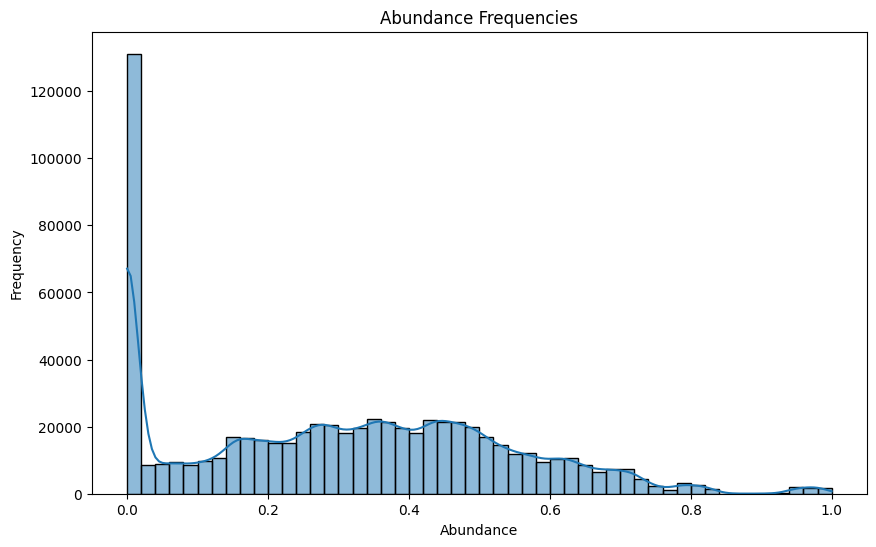

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(abundances.flatten(), bins=50, kde=True)
plt.title('Abundance Frequencies')
plt.xlabel('Abundance')
plt.ylabel('Frequency')
plt.show()